In [10]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from nltk.tokenize import ToktokTokenizer

# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Loading dataset into pandas dataframe
file = 'fakenews.csv' # https://www.kaggle.com/ruchi798/how-do-you-recognize-fake-news/data

df = pd.read_csv(file)
df = shuffle(df) # randomize bc real news is listed first

# We do not need to preprocess bc this dataset already has text_without_stopwords column done

In [3]:
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
1933,Bob Wright,2016-10-26T22:46:37.416+03:00,no title,shawn please dont send him to canada we have e...,english,westernjournalism.com,http://static.westernjournalism.com/wp-content...,bias,Real,title,jorge cabrera scandal first lady photoop convi...,1.0
709,Corbett,2016-11-19T22:09:45.115+02:00,crisitunity in indias cash crunch,this month on film literature and the new worl...,english,corbettreport.com,No Image URL,bs,Fake,crisitunity indias cash crunch,month film literature new world order james jo...,0.0
1707,Letsbereal,2016-10-26T11:26:00.000+03:00,eu states agree caps on wholesale roaming charges,as the election is inching slowly towards its ...,english,prisonplanet.com,No Image URL,conspiracy,Fake,title,swallowed red pill take test swallowed red pil...,0.0
986,noreply@blogger.com (Der Postillon),2016-11-14T18:18:51.118+02:00,katastrophenschutz warnt werwölfe heute nacht ...,dienstag november erdogan ratlos was er noch...,german,der-postillon.com,https://4.bp.blogspot.com/-Nc2wxYUropI/U4zwCX7...,bs,Fake,flitzer auf dem spielfeld schachwm muss kurzze...,mittwoch november einigung bei regierungsbildu...,1.0
1701,Letsbereal,2016-10-27T14:13:00.000+03:00,no title,more emotions men should master more emotion...,english,prisonplanet.com,No Image URL,conspiracy,Fake,title,home month popular tips sex croatian girls tip...,0.0


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['text'].apply(lambda x: np.str_(x)))

In [5]:
# creating bool column, True if Real
df['real'] = np.where(df['label'] == 'Real', True, False)

# for convenience
df.where(df['label'] == 'Real')
df.where(df['label'] == 'Fake')

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,real
1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709,Corbett,2016-11-19T22:09:45.115+02:00,crisitunity in indias cash crunch,this month on film literature and the new worl...,english,corbettreport.com,No Image URL,bs,Fake,crisitunity indias cash crunch,month film literature new world order james jo...,0.0,False
1707,Letsbereal,2016-10-26T11:26:00.000+03:00,eu states agree caps on wholesale roaming charges,as the election is inching slowly towards its ...,english,prisonplanet.com,No Image URL,conspiracy,Fake,title,swallowed red pill take test swallowed red pil...,0.0,False
986,noreply@blogger.com (Der Postillon),2016-11-14T18:18:51.118+02:00,katastrophenschutz warnt werwölfe heute nacht ...,dienstag november erdogan ratlos was er noch...,german,der-postillon.com,https://4.bp.blogspot.com/-Nc2wxYUropI/U4zwCX7...,bs,Fake,flitzer auf dem spielfeld schachwm muss kurzze...,mittwoch november einigung bei regierungsbildu...,1.0,False
1701,Letsbereal,2016-10-27T14:13:00.000+03:00,no title,more emotions men should master more emotion...,english,prisonplanet.com,No Image URL,conspiracy,Fake,title,home month popular tips sex croatian girls tip...,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1353,Jenn Ryan,2016-10-31T21:47:43.872+02:00,can you get a stunning and healthy smile with ...,cnns own average of all polls shows hillary cl...,english,naturalnews.com,http://10667-presscdn-0-56.pagely.netdna-cdn.c...,junksci,Fake,fight inflammation vitamins minerals get,pm donald trump opposed war iraq ever since do...,1.0,False
121,tokyowashi (noreply@blogger.com),2016-11-01T00:49:25.485+02:00,why hillary clintons campaign is collapsing t...,source infowars \n\nvote fraud expert bev harr...,english,abeldanger.net,No Image URL,bs,Fake,hillary clintons campaign collapsing true news,source infowars vote fraud expert bev harris e...,0.0,False
1378,Tru Foods Nutrition,2016-11-02T02:49:00.000+02:00,this simple daily tip can improve your health ...,the trump campaign is so desperate that they a...,english,naturalnews.com,http://10667-presscdn-0-56.pagely.netdna-cdn.c...,junksci,Fake,interesting fun facts stethoscope,jason easley fri oct th pm donald trump wants ...,1.0,False


In [6]:
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,real
1933,Bob Wright,2016-10-26T22:46:37.416+03:00,no title,shawn please dont send him to canada we have e...,english,westernjournalism.com,http://static.westernjournalism.com/wp-content...,bias,Real,title,jorge cabrera scandal first lady photoop convi...,1.0,True
709,Corbett,2016-11-19T22:09:45.115+02:00,crisitunity in indias cash crunch,this month on film literature and the new worl...,english,corbettreport.com,No Image URL,bs,Fake,crisitunity indias cash crunch,month film literature new world order james jo...,0.0,False
1707,Letsbereal,2016-10-26T11:26:00.000+03:00,eu states agree caps on wholesale roaming charges,as the election is inching slowly towards its ...,english,prisonplanet.com,No Image URL,conspiracy,Fake,title,swallowed red pill take test swallowed red pil...,0.0,False
986,noreply@blogger.com (Der Postillon),2016-11-14T18:18:51.118+02:00,katastrophenschutz warnt werwölfe heute nacht ...,dienstag november erdogan ratlos was er noch...,german,der-postillon.com,https://4.bp.blogspot.com/-Nc2wxYUropI/U4zwCX7...,bs,Fake,flitzer auf dem spielfeld schachwm muss kurzze...,mittwoch november einigung bei regierungsbildu...,1.0,False
1701,Letsbereal,2016-10-27T14:13:00.000+03:00,no title,more emotions men should master more emotion...,english,prisonplanet.com,No Image URL,conspiracy,Fake,title,home month popular tips sex croatian girls tip...,0.0,False


In [ ]:
def tfidf(X_train,X_test):
tfidf_vec = TfidfVectorizer()
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)
return X_train_tfidf,X_test_tfidf

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['real'], test_size=0.25, random_state=5)

In [17]:
def tfidf(X_train,X_test):
    tfidf_vec = TfidfVectorizer()
    X_train_tfidf = tfidf_vec.fit_transform(X_train)
    X_test_tfidf = tfidf_vec.transform(X_test)
    return X_train_tfidf,X_test_tfidf

In [20]:
# creating 3 different types of model for our sentiment analysis problem
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(Y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(Y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)



              precision    recall  f1-score   support

       False       0.66      0.93      0.77       327
        True       0.64      0.20      0.30       197

    accuracy                           0.66       524
   macro avg       0.65      0.57      0.54       524
weighted avg       0.65      0.66      0.60       524



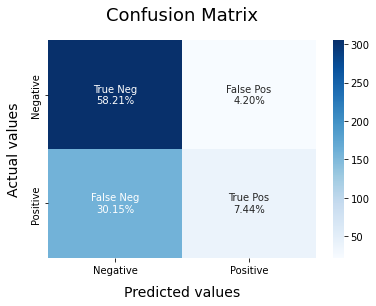

In [21]:
#BernoulliNB Model
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, Y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

       False       0.76      0.75      0.76       327
        True       0.60      0.61      0.61       197

    accuracy                           0.70       524
   macro avg       0.68      0.68      0.68       524
weighted avg       0.70      0.70      0.70       524



/Users/iyanuoluwashode/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


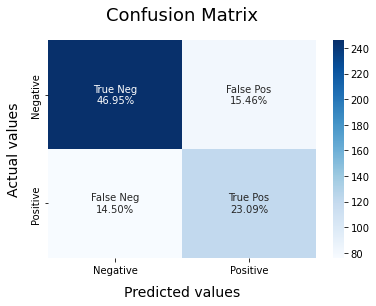

In [23]:
#Linear SVC model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, Y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

       False       0.77      0.79      0.78       327
        True       0.63      0.61      0.62       197

    accuracy                           0.72       524
   macro avg       0.70      0.70      0.70       524
weighted avg       0.72      0.72      0.72       524



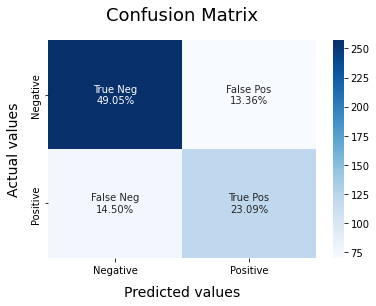

In [24]:
#logistic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, Y_train)
model_Evaluate(LRmodel)